In [2]:
import numpy as np
from PIL import Image
import IPython.display as display

In [3]:
def bilinear_interpolation_color():
    # 이미지 크기 설정
    width, height = 256, 256
    # 결과 이미지 초기화
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # 네 모서리의 색상 지정
    top_left = np.array([255, 0, 0])  # 빨간색
    top_right = np.array([0, 0, 255])  # 파란색
    bottom_left = np.array([0, 255, 0])  # 초록색
    bottom_right = np.array([255, 255, 0])  # 노란색

    for y in range(height):
        for x in range(width):
            # x, y 좌표에 대한 비율 계산
            rx = x / (width - 1)
            ry = y / (height - 1)

            # 수평 방향 선형 보간
            top_interpolated = (1 - rx) * top_left + rx * top_right
            bottom_interpolated = (1 - rx) * bottom_left + rx * bottom_right

            # 수직 방향 선형 보간 (최종 색상 계산)
            final_color = (1 - ry) * top_interpolated + ry * bottom_interpolated

            # 계산된 색상으로 픽셀 채우기
            image[y, x, :] = np.clip(final_color, 0, 255)

    return image

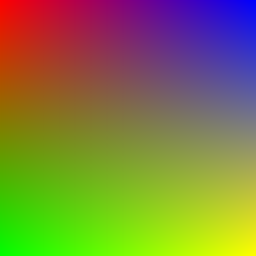

In [4]:
# 함수 실행 및 이미지 생성
bilinear_interpolated_image = bilinear_interpolation_color()

# 결과 이미지 확인 (이 코드는 실행 결과를 보여주지 않습니다. 이미지 표시 함수를 사용해야 함)
bilinear_interpolated_image.shape

# 생성된 이미지를 PIL 이미지 객체로 변환
img = Image.fromarray(bilinear_interpolated_image)

# 이미지 표시
display.display(img)